In [2]:
from openaq import OpenAQ
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import aqi

---
## Step 1: Initialize and Set up the connectivity to OpenAQ via API KEY 📊

In [ ]:
API_KEY = ''
# Get API Key from https://explore.openaq.org/

# ----- Best Practice when doing the Project (with statement - no need to client.close) -----
# with OpenAQ(api_key=API_KEY) as client:
#     pass

# However, since we just want to learn and experiment, we can just leave our connectivity to the API key open
# Note: It is very dangerous to leave the connectivity open due to memory leaks or ... (idk cybersecurity stuff)
client = OpenAQ(api_key=API_KEY)

print("✅ Set Up Complete!")
print("🛜 Connected to OpenAQ API!")
# client.close()

✅ Set Up Complete!
🛜 Connected to OpenAQ API!


---
## Step 2: Experiment with Locations  📍🗺️

### 2.1 Using .countries 

In [4]:
COUNTRY_ID = 155 # Cambodia: 57

# Search for Country via Country ID
    # .countries is more specific to find just the countries
countries = client.countries.list(limit=156)
countries_results = countries.results

found = False
for country in countries_results:
    if country.id == COUNTRY_ID:
        print(f"{country.name} found at ID: {country.id}")
        found = True
        break

if not found:
    print(f"Cannot find country with ID: {COUNTRY_ID}")    


United States found at ID: 155


### 2.2. Using .locations (more flexible and braoder)

In [ ]:
# OR a faster way (without for loop)
# .locations allow us to search for far more flexible data (basically for all I think)
try:
    response = client.locations.list(
        countries_id=COUNTRY_ID, 
        parameters_id=2, 
        limit=10 # or just put 1 for faster
    )

    location_name = response.results[0].country.name

    print(f"{location_name} found at ID: {COUNTRY_ID}")
except:
    print(f"Cannot find country with ID: {COUNTRY_ID}")

Location(id=162, name='Houston Deer Park C3', locality='Houston-Sugar Land-Baytown', timezone='America/Chicago', country=CountryBase(id=155, code='US', name='United States'), owner=OwnerBase(id=4, name='Unknown Governmental Organization'), provider=ProviderBase(id=119, name='AirNow'), is_mobile=False, is_monitor=True, instruments=[InstrumentBase(id=2, name='Government Monitor')], sensors=[SensorBase(id=273, name='co ppm', parameter=ParameterBase(id=8, name='co', units='ppm', display_name='CO')), SensorBase(id=334, name='no2 ppm', parameter=ParameterBase(id=7, name='no2', units='ppm', display_name='NO₂')), SensorBase(id=332, name='o3 ppm', parameter=ParameterBase(id=10, name='o3', units='ppm', display_name='O₃')), SensorBase(id=271, name='pm10 µg/m³', parameter=ParameterBase(id=1, name='pm10', units='µg/m³', display_name='PM10')), SensorBase(id=268, name='pm25 µg/m³', parameter=ParameterBase(id=2, name='pm25', units='µg/m³', display_name='PM2.5')), SensorBase(id=308, name='so2 ppm', par

### 2.3 Finding Country IDs

In [8]:
search_country = 'Canada'
for country in countries_results:
    if search_country.lower() == country.name.lower():
        print(f"{search_country} found at ID: {country.id}")

# And add a cannot find country: {search_country} if you want.

Canada found at ID: 156


### 2.4. Show Available Countries and Locations

In [9]:
# Step 1: Show available countries
countries = client.countries.list(limit=50)
print("Available countries:")
for i, country in enumerate(countries.results[:10]):
    print(f"{i+1}. {country.name} (ID: {country.id})")

# Step 2: User selects
choice = int(input("Choose a country (enter number): ")) - 1
selected_country = countries.results[choice]

# Step 3: Find locations in that country
locations = client.locations.list(
    countries_id=selected_country.id,
    parameters_id=2,
    limit=10
)

print(f"Found {len(locations.results)} locations in {selected_country.name}")

for location in locations.results:
    print(f"_ {location.name}")

Available countries:
1. Indonesia (ID: 1)
2. Malaysia (ID: 2)
3. Chile (ID: 3)
4. Peru (ID: 5)
5. Argentina (ID: 6)
6. Dhekelia (ID: 7)
7. Cyprus (ID: 8)
8. India (ID: 9)
9. China (ID: 10)
10. Israel (ID: 11)
Found 10 locations in Chile
_ Parque O'Higgins
_ Inpesca
_ Concón
_ Puente Alto
_ Valparaiso
_ Talagante
_ Punteras
_ Ventanas
_ Cerro Merquín
_ Kingston College


---
## Step 3: Exploring with Pollutants 💨

In [10]:
parameters = client.parameters.list()
print(f"\n6 Important Pollutant Parameters:")
for param in parameters.results[:6]:
    print(f"ID: {param.id}, Name: {param.display_name}, units: {param.units}\nDescription: {param.description}")

print(f"\nPM2.5 will be the most relevent pollutant we will be studying on.")
print(parameters.results[1])


6 Important Pollutant Parameters:
ID: 1, Name: PM10, units: µg/m³
Description: Particulate matter less than 10 micrometers in diameter mass concentration
ID: 2, Name: PM2.5, units: µg/m³
Description: Particulate matter less than 2.5 micrometers in diameter mass concentration
ID: 3, Name: O₃ mass, units: µg/m³
Description: Ozone mass concentration
ID: 4, Name: CO mass, units: µg/m³
Description: Carbon Monoxide mass concentration
ID: 5, Name: NO₂ mass, units: µg/m³
Description: Nitrogen Dioxide mass concentration
ID: 6, Name: SO₂ mass, units: µg/m³
Description: Sulfur Dioxide mass concentration

PM2.5 will be the most relevent pollutant we will be studying on.
Parameter(id=2, name='pm25', units='µg/m³', display_name='PM2.5', description='Particulate matter less than 2.5 micrometers in diameter mass concentration')


---
## Step 4: Exploring with Measurements 📏📊
Measurements - Get Actual Air Quality Data

.measurements only accepts sensors_id not location_id

In [11]:
# So, we gotta get sensors_id first
locations = client.locations.list(
    countries_id=57,
    parameters_id=2,
    limit=5
)

location_1 = locations.results[0].name
location_1_sensor = locations.results[0].sensors

print(location_1)
print(f"ID of Sensor that detects PM2.5 at {location_1}: {location_1_sensor[1].id}")


Kok Roka
ID of Sensor that detects PM2.5 at Kok Roka: 12742460


### 4.1. Accessing the latest data from a station

In [12]:
locations_cam = client.locations.list(
    countries_id=57,
    parameters_id=2,
    limit=10
)

# Define recent time range (last 7 days) 
    # We do this because of the API
    # So, API might return whatever measurements it feels like, which could be old data from years ago!
    # So, we define this, to tell measurements (below) to access only from the last 7 days (date_from) until today (date_to)
    # Then latest = measurements.results[-1] tells that to access the last data (because the list returns in ascending order)

date_to = datetime.now()
date_from = date_to - timedelta(days=7) # or how many days you want the API to search from


for location in locations_cam.results:
    sensor_id = location.sensors[1].id
    # print(location)
    measurements = client.measurements.list(
        sensors_id=sensor_id,
        datetime_from=date_from.strftime('%Y-%m-%d'),
        # datetime_to=date_to.strftime('%Y-%m-%d'),
    )

    # Only show if it has the data from the last 7 days (or how many days you want the API to search from)
    if measurements.results:
        latest = measurements.results[-1]
        print(f"{location.name}: Last data at {latest.period.datetime_to.local}")

    if location.datetime_last:
        print(f"{location.name}: Last data at {location.datetime_last.local}\n")

Kok Roka: Last data at 2025-11-21T12:00:00+07:00
Kok Roka: Last data at 2025-11-21T12:00:00+07:00

Civil Engineering, NPIC: Last data at 2025-11-21T12:00:00+07:00
Civil Engineering, NPIC: Last data at 2025-11-21T12:00:00+07:00

Kampong Cham Mekong View: Last data at 2025-05-16T18:00:00+07:00

Grad: Last data at 2025-05-04T15:00:00+07:00

បន្ទប់កិច្ចការសង្គម: Last data at 2025-11-21T12:00:00+07:00
បន្ទប់កិច្ចការសង្គម: Last data at 2025-11-21T12:00:00+07:00

AUPP Liger Leadership Academy: Last data at 2025-06-08T08:00:00+07:00

NIE: Last data at 2025-06-07T12:00:00+07:00

Aupp liger leadership academy: Last data at 2025-08-14T17:00:00+07:00

AUPP Liger Leadership Academy: Last data at 2025-08-14T17:00:00+07:00

AUPP Liger: Last data at 2025-08-14T11:00:00+07:00



---
## Step 5: Simple Data Visualization 📊

### 5.1. Get the data and turn it into a DataFrame

In [16]:
locations = client.locations.list(
    countries_id=57,
    parameters_id=2,
    limit=1
)

location = locations.results[0]
id_of_sensor = location.sensors[1].id

date_to = datetime.now()
date_from = date_to - timedelta(days=1) # or how many days you want the API to search from


measurements = client.measurements.list(
    sensors_id=id_of_sensor,
    datetime_from=date_from.strftime("%Y-%m-%d"),
    datetime_to=date_to.strftime("%Y-%m-%d")
)

print(location)

print(f"\nFound {len(measurements.results)} measurements")

# Convert to pandas DataFrame for easier analysis
df = pd.DataFrame([
    {
        'timestamp': m.period.datetime_to.local,
        'value': m.value,
        'parameter': m.parameter.name,
        'units': m.parameter.units
    }
    for m in measurements.results
])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Separate date and time
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

df

Location(id=3400984, name='Kok Roka', locality=None, timezone='Asia/Phnom_Penh', country=CountryBase(id=57, code='KH', name='Cambodia'), owner=OwnerBase(id=11396, name='Kouk Roka'), provider=ProviderBase(id=66, name='AirGradient'), is_mobile=False, is_monitor=False, instruments=[InstrumentBase(id=1, name='N/A')], sensors=[SensorBase(id=12742459, name='pm1 µg/m³', parameter=ParameterBase(id=19, name='pm1', units='µg/m³', display_name='PM1')), SensorBase(id=12742460, name='pm25 µg/m³', parameter=ParameterBase(id=2, name='pm25', units='µg/m³', display_name='PM2.5')), SensorBase(id=12742461, name='relativehumidity %', parameter=ParameterBase(id=98, name='relativehumidity', units='%', display_name='RH')), SensorBase(id=12742462, name='temperature c', parameter=ParameterBase(id=100, name='temperature', units='c', display_name='Temperature (C)')), SensorBase(id=12742463, name='um003 particles/cm³', parameter=ParameterBase(id=125, name='um003', units='particles/cm³', display_name='PM0.3 count'

,timestamp,value,parameter,units,date,time
0,2025-11-20 01:00:00+07:00,1.510792,pm25,µg/m³,2025-11-20,01:00:00
1,2025-11-20 02:00:00+07:00,0.951333,pm25,µg/m³,2025-11-20,02:00:00
2,2025-11-20 03:00:00+07:00,1.276083,pm25,µg/m³,2025-11-20,03:00:00
3,2025-11-20 04:00:00+07:00,1.015583,pm25,µg/m³,2025-11-20,04:00:00
4,2025-11-20 05:00:00+07:00,0.986569,pm25,µg/m³,2025-11-20,05:00:00
5,2025-11-20 06:00:00+07:00,0.732917,pm25,µg/m³,2025-11-20,06:00:00
6,2025-11-20 07:00:00+07:00,0.890625,pm25,µg/m³,2025-11-20,07:00:00
7,2025-11-20 08:00:00+07:00,0.730625,pm25,µg/m³,2025-11-20,08:00:00
8,2025-11-20 09:00:00+07:00,0.691375,pm25,µg/m³,2025-11-20,09:00:00
9,2025-11-20 10:00:00+07:00,0.999917,pm25,µg/m³,2025-11-20,10:00:00


### 5.2. VIZUALIZATION 🥳

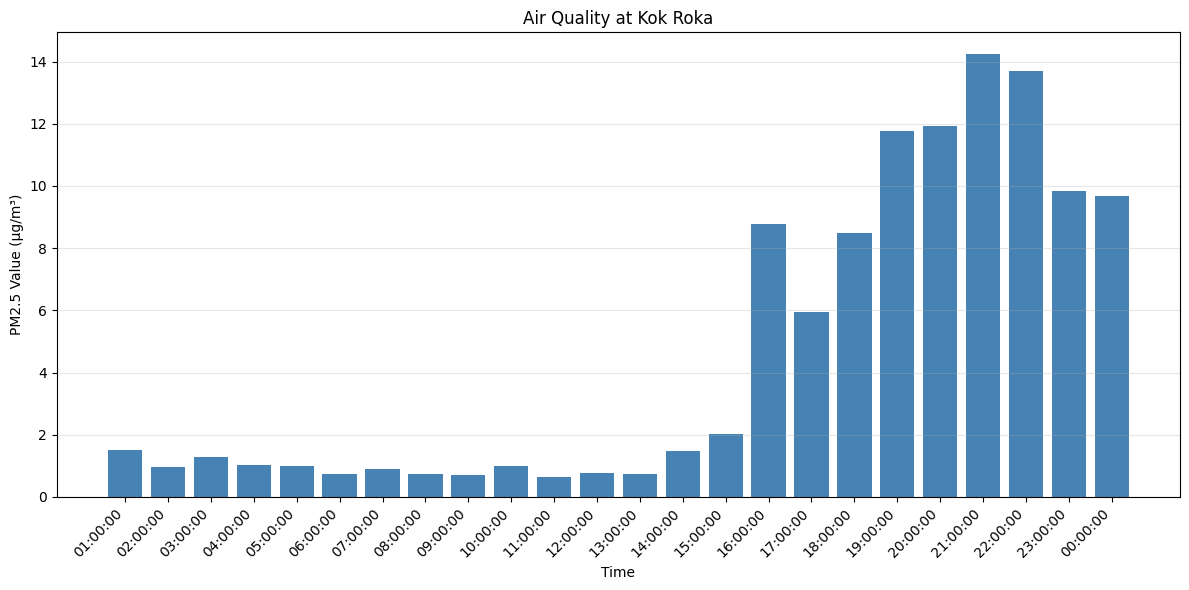

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(range(len(df)), df['value'], color='steelblue')

# Set x-axis labels to time
plt.xticks(range(len(df)), df['time'], rotation=45, ha='right')
# => range(len(df)) creates positions: [0, 1, 2, 3, 4, ...] (one for each bar)
# "At position 0, show this time"
# "At position 1, show this time"
# "At position 2, show this time"

plt.xlabel('Time')
plt.ylabel('PM2.5 Value (µg/m³)')
plt.title(f'Air Quality at {location.name}')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## Additions! 🌟

### Pagination - the process of dividing content into separate, manageable pages,

## Locality (City)

In [ ]:
COUNTRY_ID = '57'

locations = client.locations.list(
    countries_id=COUNTRY_ID,
    parameters_id=2,
)

localities = set()
for location in locations.results:
    print(location)
    if location.locality:
        localities.add(location.locality)

print("Available Cities:")
for city in sorted(localities):
    print("-", city)

Location(id=3400984, name='Kok Roka', locality=None, timezone='Asia/Phnom_Penh', country=CountryBase(id=57, code='KH', name='Cambodia'), owner=OwnerBase(id=11396, name='Kouk Roka'), provider=ProviderBase(id=66, name='AirGradient'), is_mobile=False, is_monitor=False, instruments=[InstrumentBase(id=24, name='AirGradient Open Air Generation 1 (O-1PST)')], sensors=[SensorBase(id=12742459, name='pm1 µg/m³', parameter=ParameterBase(id=19, name='pm1', units='µg/m³', display_name='PM1')), SensorBase(id=12742460, name='pm25 µg/m³', parameter=ParameterBase(id=2, name='pm25', units='µg/m³', display_name='PM2.5')), SensorBase(id=12742461, name='relativehumidity %', parameter=ParameterBase(id=98, name='relativehumidity', units='%', display_name='RH')), SensorBase(id=12742462, name='temperature c', parameter=ParameterBase(id=100, name='temperature', units='c', display_name='Temperature (C)')), SensorBase(id=12742463, name='um003 particles/cm³', parameter=ParameterBase(id=125, name='um003', units='pa